<h1><center><font color='Green'>Predicting Property Fair Visitors</font></center></h1> <a class="anchor" id="2"></a>

### Table of Contents
   
1. ### [Part 0 : Import packages and load the data](#2)
    * [Import packages](#2_1)
    * [loading data](#2_2)



2. ### [Part 1 : Missing Values ](#3)


3. ### [Part 2 : Data Preparation for modeling ](#4)
    * [datatypes for each column ](#4_1)
    * [Numeric columns & distribution histograms ](#4_2)
    * [Categorical columns & Frequency distribution histogram ](#4_3)


4. ### [Part 3 : Data cleaning ](#5)
    * [Handle duplicates: ](#5_1)
    * [Handle missing values: ](#5_2)
    * [Handle Numerical variables: ](#5_3)
    * [Formatting data: ](#5_4)

5. ### [Part 5 : Modeling ](#7)
    * [Example](#5_1)

<h1><center><font color='blue'>Part 0 : Import packages and load the data</font></center></h1> <a class="anchor" id="2"></a>

### 0. Import packages

***Load the necessary packages*** <a class="anchor" id="2_1"></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

import re
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    f1_score,
    classification_report,
    brier_score_loss,
    roc_curve,
    roc_auc_score,
    recall_score,
    precision_score,
)
import plotly.express as px
import plotly.graph_objs as go
import plotly.subplots as tls
import plotly.figure_factory as ff
import plotly.offline as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance

import os
import pickle
import shap
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from scipy.stats import boxcox
from sklearn import model_selection

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


### 1. Loading data <a class="anchor" id="2_2"></a>

**Load data into a dataframe**

Data file are in excel format, hence we can use the built-in functions form pandas pd.read_excel(filename)
in the excel file we have 3 sheets, so we load the data of each sheet using this function pd.read_excel(filename,sheet_name='sheet name' )

In [ ]:
Property_purchase_data = pd.read_excel(
    "Predictive Modeling Assignment interns - Questions _ Data.xlsx",
    sheet_name="Property_purchase_data",
)

In [3]:
Additional_data = pd.read_excel(
    "Predictive Modeling Assignment interns - Questions _ Data.xlsx",
    sheet_name="Additional_data",
)

We will also print the first 4 rows to the screen. Just to see what the first dataset looks like

In [4]:
Property_purchase_data.head(4)

,VisitorID,Proj_Group,Proj_Segment,Proj_Type,Visitor_Group,Visitor_Gender,Question_Age,Question_Budget,Question_HHIncome,Question_InstallmentMonthly,Question_MarriageStatus,Question_Nationality,Question_Occupation,Question_P_Income,Question_TimeToMoveIn,Target_Variable_Convert
0,1,Outer,B,Standard Units,Central,F,51 +,11.3,610326,100133,Single,Not Answer,Business Owner,Not Answer,Not Answer,False
1,2,Outer,A,Standard Units,Outer,M,46 - 50,13.5,421363,Not Answer,Married with Children,Not Answer,Other(Please specify),225000,Not Answer,False
2,3,Central,B,Premium Units,Central,F,51 +,11.3,Not Answer,Not Answer,Not Answer,India,Not Answer,Not Answer,Not Answer,False
3,4,Urban,A,Standard Units,Central,M,51 +,Not Answer,Not Answer,Not Answer,Married with Children,Not Answer,Business Owner,Not Answer,Not Answer,False


In [5]:
Additional_data.head(4)

,VisitorID,Question_Property_Buy_Objective,Question_Channel,Question_Factors_Considered,Question_Reason_to_visit_property_fair
0,1,Residence,Not_Answer,Near_ShoppingMall,Company
1,2,NaN,Billboard,NaN,Location
2,3,Residence,Billboard,Not_Answer,Location
3,4,Residence,Billboard,Not_Answer,Location


From above we can already see that there are a lot of NaN values. We will replace or remove those values later.

we observe also that there is a lot of columns **'Not Answer'** and **'Not_Answer'** values then we should to replace it later to NaN values. 


The first 4 rows of the dataframe also show us that there are numeric data and categorical data, that we will need to transform to the right form.

**Combining two dataframes**

We loaded data in two different pandas dataframes. Nonetheless, we might be interested in putting the data into a single dataframe to access it more
easily. We can merge the two dataframes on a common column ( VisitorID ) using the function pd.merge() from pandas.


In [6]:
train = pd.merge(Additional_data, Property_purchase_data, on="VisitorID")

Let's take a look at the new train dataframe, this time at the last 4 rows.

In [7]:
train.tail(4)

,VisitorID,Question_Property_Buy_Objective,Question_Channel,Question_Factors_Considered,Question_Reason_to_visit_property_fair,Proj_Group,Proj_Segment,Proj_Type,Visitor_Group,Visitor_Gender,Question_Age,Question_Budget,Question_HHIncome,Question_InstallmentMonthly,Question_MarriageStatus,Question_Nationality,Question_Occupation,Question_P_Income,Question_TimeToMoveIn,Target_Variable_Convert
119996,119997,Residence,Not_Answer,Not_Answer,Not_Answer,Urban,D,Standard Units,Outer,M,31 - 35,5.5,190676,Not Answer,Married,Not Answer,Not Answer,Not Answer,Not Answer,False
119997,119998,Residence,Referral,Not_Answer,Location,Outer,B,Standard Units,Central,F,Not Answer,Not Answer,Not Answer,Not Answer,Married,Not Answer,Business Employee,Not Answer,Not Answer,False
119998,119999,Residence,Not_Answer,Not_Answer,Company,Urban,C,Standard Units,Major,F,25 - 30,7.5,430822,72532,Single,Not Answer,Civil Servant,Not Answer,Not Answer,True
119999,120000,Residence,TV,Near_Previous_Home,Location,Urban,B,Standard Units,Not Answer,M,41 - 45,7.5,105331,49976,Married,Not Answer,Business Employee,Not Answer,Not Answer,False


<h1><center><font color='blue'>Part 1 : Missing Values </font></center></h1> <a class="anchor" id="3"></a>

**The list of variables with missing data and number of missing values** 

We observe that there are a lot of columns with 'Not Answer' and 'Not_Answer' values representing the NAN values. Thus, we should replace them with NaN values.

In [8]:
train = train.replace("Not Answer", np.nan)
train = train.replace("Not_Answer", np.nan)

This code is replacing two different strings in a pandas DataFrame train.

The first line replaces all occurrences of the string "Not Answer" with np.nan, which stands for "Not a Number". This is a common way to represent missing or undefined values in numerical computations.

The second line replaces all occurrences of the string "Not_Answer" with np.nan.

By replacing these two strings with np.nan, the code is essentially indicating that the values corresponding to these strings are missing or undefined. This will allow for easier handling of missing data in any further analysis or processing of the data in the train DataFrame.

We are also concerned we have a lot of missing data so we can check how much of our data is missing.

**Note:** We've transformed the output to a dataframe to facilitate visualization. This will be used for data cleaning in the next exercise.

In [9]:
pd.DataFrame({"Missing values (%)": train.isnull().sum() / len(train.index) * 100})

,Missing values (%)
VisitorID,0.000000
Question_Property_Buy_Objective,60.086667
Question_Channel,16.069167
Question_Factors_Considered,67.446667
Question_Reason_to_visit_property_fair,19.959167
Proj_Group,0.000000
Proj_Segment,0.000000
Proj_Type,0.000000
Visitor_Group,33.058333
Visitor_Gender,1.331667


**Data types**

Often, it is useful to understand what data we are dealing with, as the data types might end up causing errors into our analysis at a later stage.

In [10]:
pd.DataFrame({"Data type": train.dtypes})

,Data type
VisitorID,int64
Question_Property_Buy_Objective,object
Question_Channel,object
Question_Factors_Considered,object
Question_Reason_to_visit_property_fair,object
Proj_Group,object
Proj_Segment,object
Proj_Type,object
Visitor_Group,object
Visitor_Gender,object


Upon examining the data, we noticed that the **"Question_InstallmentMonthly"** column has an object data type, but it is actually supposed to represent the installment amount in a numerical format, specifically as a float. 

Additionally, the data in the column includes the string value **'Cash'** which is not relevant to the representation of the installment amount and should be removed.

In [11]:
df_Cash = [i for i in train["Question_InstallmentMonthly"] if i == "Cash"]

The code defines a list comprehension df_Cash that extracts values from the **"Question_InstallmentMonthly"** column of a pandas DataFrame train.

The list comprehension iterates through each element i in the **"Question_InstallmentMonthly"** column and includes i in the list df_Cash if the condition i == 'Cash' is satisfied. In other words, df_Cash will contain all elements in the "Question_InstallmentMonthly" column that are equal to the string **'Cash'**.

So, this list comprehension essentially creates a new list df_Cash containing all elements from the **"Question_InstallmentMonthly"** column that are equal to the string **'Cash'**.

In [12]:
print(
    "The percentage of the Cash values in data = ", len(df_Cash) / len(train) * 100, "%"
)

The percentage of the Cash values in data =  3.6025 %


This code calculates and prints the percentage of values in the "Question_InstallmentMonthly" column that are equal to the string 'Cash'.

The calculation is performed by dividing the length of the list df_Cash (which contains all elements from the "Question_InstallmentMonthly" column equal to 'Cash') by the length of the train DataFrame, and then multiplying the result by 100.

In [13]:
train["Question_InstallmentMonthly"] = train["Question_InstallmentMonthly"].replace(
    "Cash", np.nan
)

To resolve this problem should we replace method of a pandas DataFrame to replace all occurrences of the string **Cash** with the special value np.nan, which stands for "Not a Number". This is a common way to represent missing or undefined values in numerical computations.

The code specifically replaces the **Cash** values in the **"Question_InstallmentMonthly"** column of the train DataFrame by reassigning the result of the replace method to the same column.

So, this line of code essentially replaces all occurrences of the string **Cash** in the **"Question_InstallmentMonthly"** column with np.nan, indicating that these values are missing or undefined. This will allow for easier handling of missing data in any further analysis or processing of the data in the train DataFrame.

In [14]:
pd.DataFrame({"Data type": train.dtypes})

,Data type
VisitorID,int64
Question_Property_Buy_Objective,object
Question_Channel,object
Question_Factors_Considered,object
Question_Reason_to_visit_property_fair,object
Proj_Group,object
Proj_Segment,object
Proj_Type,object
Visitor_Group,object
Visitor_Gender,object


The values in the **"Question_InstallmentMonthly"** column will have **3.6025%** added to compensate for missing values.

In [15]:
pd.DataFrame({"Missing values (%)": train.isnull().sum() / len(train.index) * 100})

,Missing values (%)
VisitorID,0.000000
Question_Property_Buy_Objective,60.086667
Question_Channel,16.069167
Question_Factors_Considered,67.446667
Question_Reason_to_visit_property_fair,19.959167
Proj_Group,0.000000
Proj_Segment,0.000000
Proj_Type,0.000000
Visitor_Group,33.058333
Visitor_Gender,1.331667


<h1><center><font color='blue'>Part 2 : Data Preparation for modeling (classification) </font></center></h1> <a class="anchor" id="4"></a>

### 1. datatypes for each column <a class="anchor" id="4_1"></a>

In [16]:
train.sample(5)

,VisitorID,Question_Property_Buy_Objective,Question_Channel,Question_Factors_Considered,Question_Reason_to_visit_property_fair,Proj_Group,Proj_Segment,Proj_Type,Visitor_Group,Visitor_Gender,Question_Age,Question_Budget,Question_HHIncome,Question_InstallmentMonthly,Question_MarriageStatus,Question_Nationality,Question_Occupation,Question_P_Income,Question_TimeToMoveIn,Target_Variable_Convert
76707,76708,NaN,Billboard,NaN,NaN,Major,C,Premium Units,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
71657,71658,NaN,Billboard,Near_work_place,Location,Urban,B,Premium Units,NaN,F,25 - 30,3.5,NaN,NaN,NaN,NaN,Business Employee,NaN,NaN,False
115070,115071,Residence,NaN,Near_Previous_Home,Location,Outer,B,Standard Units,Outer,M,31 - 35,10.3,426978.0,117153.0,Single,NaN,Civil Servant,NaN,NaN,False
115317,115318,NaN,NaN,NaN,Location,Outer,B,Standard Units,NaN,F,NaN,13.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
114640,114641,Residence,TV,Near_work_place,Location,Major,C,Standard Units,NaN,M,46 - 50,4.5,170107.0,39965.0,Married with Children,India,Civil Servant,NaN,NaN,False


This code is used to extract a random sample of 5 rows from a Pandas DataFrame named "train". The sample() function is used to randomly select a specified number of rows from a DataFrame. In this case, sample(5) is used to select 5 random rows from the "train" DataFrame.

This can be useful if you want to quickly inspect a random subset of the data in the "train" DataFrame to get a feel for the data and check for any issues or patterns.

In [17]:
pd.DataFrame({"Data type": train.dtypes})

,Data type
VisitorID,int64
Question_Property_Buy_Objective,object
Question_Channel,object
Question_Factors_Considered,object
Question_Reason_to_visit_property_fair,object
Proj_Group,object
Proj_Segment,object
Proj_Type,object
Visitor_Group,object
Visitor_Gender,object


After identifying the missing values in the data, the data types of each column are checked using the bellow code. 

The result shows that there are **6 numerical variables**, **13 categorical variables**, and the target variable represented as a **boolean variable**.

### 2. Numeric columns & distribution histograms <a class="anchor" id="4_2"></a>

we observe that there are : 
- 6 numerical variables 
    - VisitorID : visitor identifier no need to make a distribution histogram for this column 
    - Question_Budget
    - Question_HHIncome	
    - Question_InstallmentMonthly	
    - Question_P_Income	
    - Question_TimeToMoveIn	
    

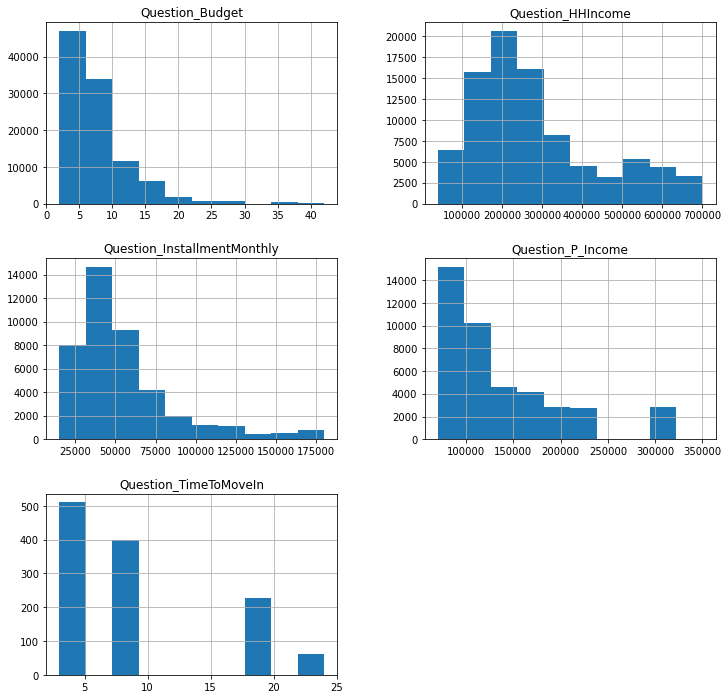

In [18]:
numeric_features = [
    "Question_Budget",
    "Question_HHIncome",
    "Question_InstallmentMonthly",
    "Question_P_Income",
    "Question_TimeToMoveIn",
]
train[numeric_features].hist(figsize=(12, 12))

**Density plots** are useful for visualizing the distribution of values within each column. By examining the shape of the density plots, we can gain insights into the distribution of values, including the range of values, the number of unique values, and the shape of the distribution. This information can help we decide which statistical techniques to use for analyzing or processing the data.

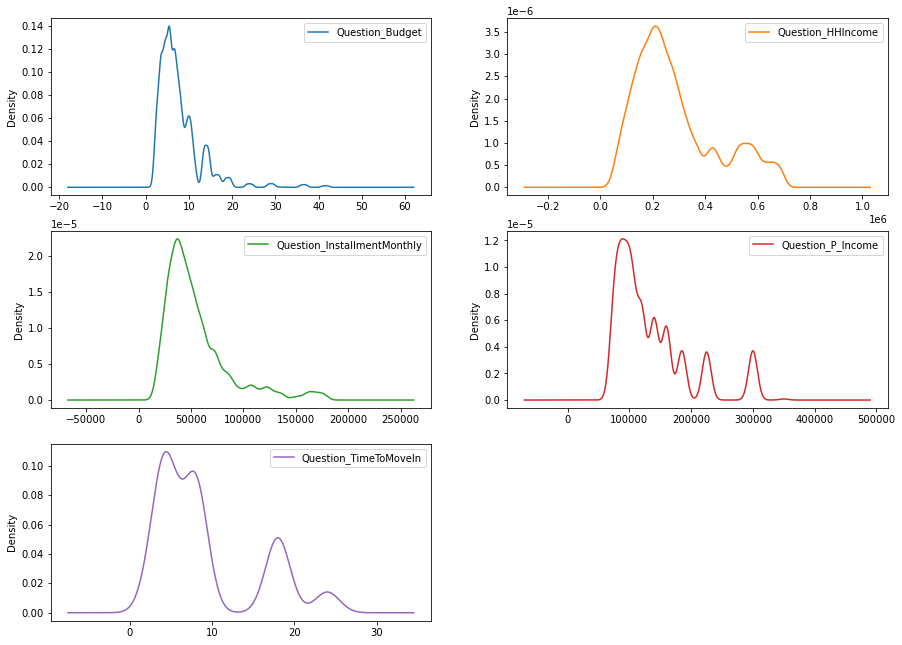

In [19]:
train[numeric_features].plot(
    kind="density", subplots=True, layout=(4, 2), sharex=False, figsize=(15, 15)
)

Visualizing the **density** of numerical columns in a DataFrame is important for several reasons:

1. Understanding the distribution of values: Density plots provide a visual representation of the distribution of values within a column. This information is crucial in understanding the range of values, the number of unique values, and the shape of the distribution.

2. Identifying outliers and anomalies: By visualizing the density of the data, it's easier to identify outliers and anomalies in the data. Outliers and anomalies can have a significant impact on statistical analysis, so it's important to identify them as early as possible.

3. Deciding on data pre-processing techniques: The density plots can help you decide which data pre-processing techniques to use. For example, if the data is **heavily skewed**, you might consider **normalizing** the data.

4. Improving accuracy of models: Visualizing the density of the data can help improve the accuracy of predictive models. For example, if a column is **heavily skewed**, it might be a good idea to **log-transform** the data before building the model.

Overall, visualizing the density of numerical columns provides valuable information about the data, which can be used to make informed decisions during the data analysis and modeling process.

### 3. Categorical columns &  Frequency distribution histogram <a class="anchor" id="4_3"></a>

This code generates a separate **frequency distribution histogram** for each **categorical column** in the dataframe "train". The histograms display the frequency of each category in each column, allowing you to see the distribution of the categorical data and to identify any patterns or trends.

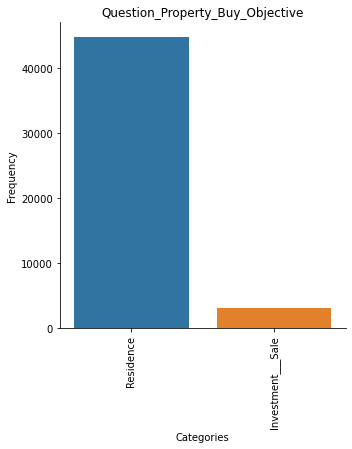

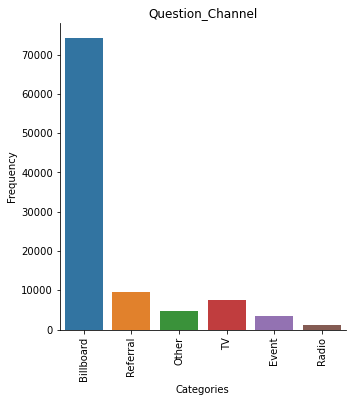

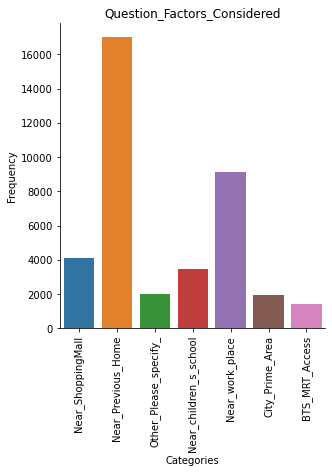

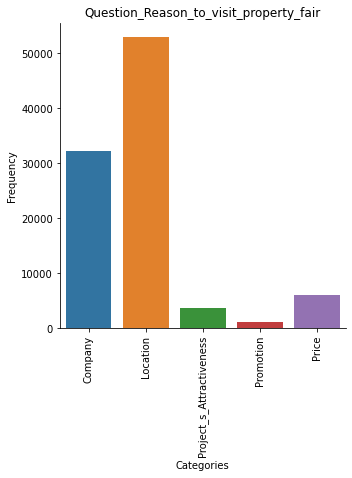

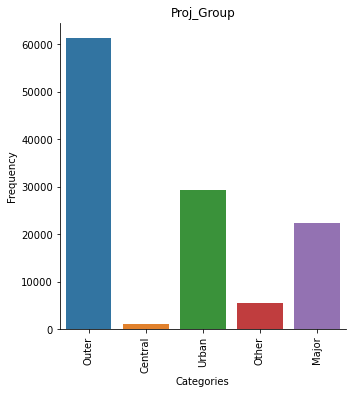

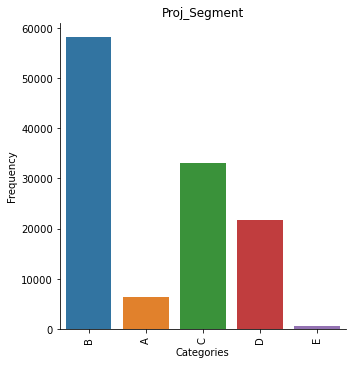

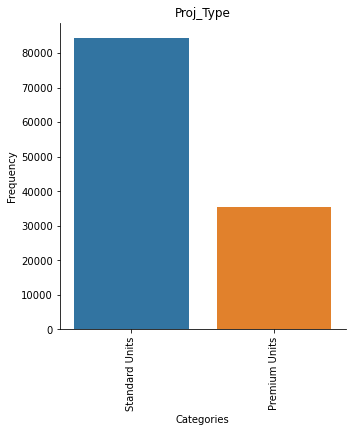

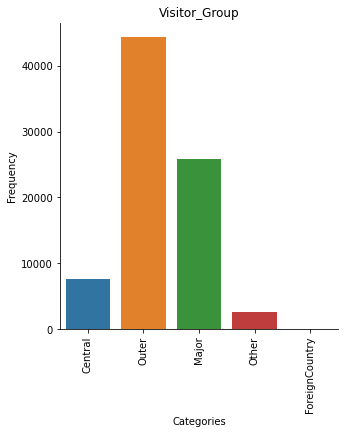

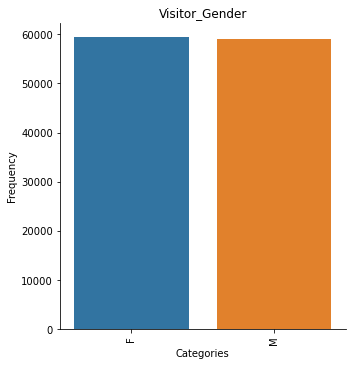

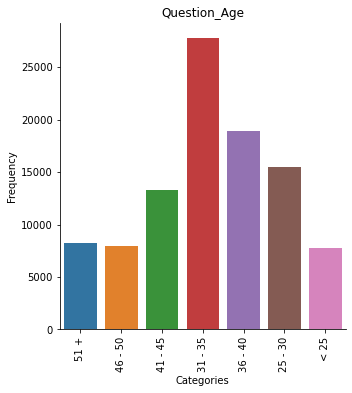

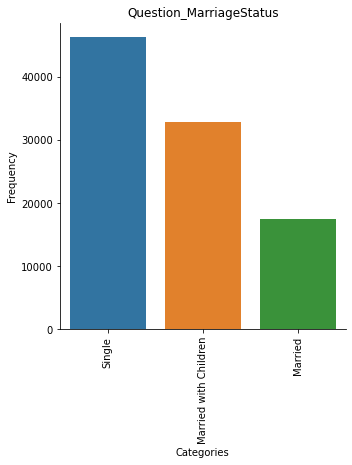

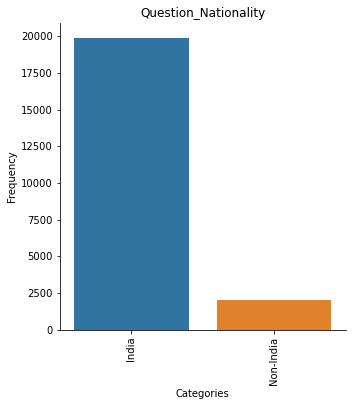

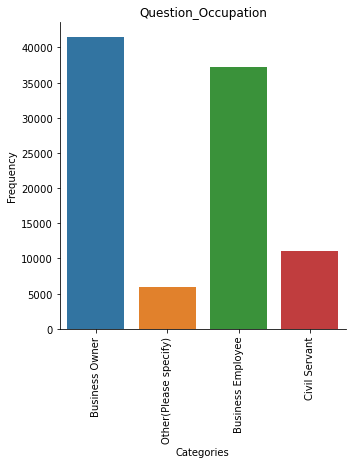

In [20]:
# Specify the categorical columns
Categorical_features = list(train.select_dtypes(["object"]).columns)

# Plot a histogram for each categorical column
for col in Categorical_features:
    sns.catplot(data=train, x=col, kind="count")
    plt.title(col)
    plt.xlabel("Categories")
    plt.ylabel("Frequency")
    plt.xticks(rotation=90)
    plt.show()

#### Target variable

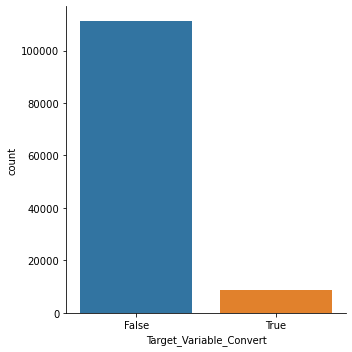

In [21]:
sns.catplot(data=train, x="Target_Variable_Convert", kind="count")

Frequency distribution histograms for categorical columns are important for several reasons:

1. Understanding the distribution of data: Frequency distribution histograms help you understand how the data is distributed among different categories in a column. This is especially useful when you have a large number of categories in a column and want to see the distribution of the data visually.

2. Identifying **outliers**: By visualizing the frequency distribution, you can identify any categories that have much **higher** or **lower** frequency than the others. These outliers can indicate potential data quality issues or might need further investigation.

3. Detecting **imbalances**: If the target variable is binary (i.e., True/False), it is important to check the distribution of the target variable within each category. If there is a significant **imbalance in the target variable** for one or more categories, it might affect the performance of predictive models.

4. Preparing for **feature engineering**: Understanding the distribution of the categorical data can help you prepare for feature engineering. For example, you might decide to combine categories with low frequency into a single category, or create new features based on the frequency of categories.

Overall, visualizing frequency distribution histograms for categorical columns can give we valuable insights into your data and help we make informed decisions about the next steps in your data analysis.

<h1><center><font color='blue'>Part 3 : Data cleaning </font></center></h1> <a class="anchor" id="4"></a>

**Data cleaning** is a crucial step in the data preprocessing stage. The steps involved in data cleaning are as follows:


1. Handle **duplicates**: Remove duplicate rows or columns from the data.


2. a.  Handle **missing values**: Identify and either remove or fill in missing values in the data.

   b. Handle **irrelevant data**: Remove data columns that are not relevant to the analysis or modeling process.


3. Handle **Numerical variables**: Transforming non-normal data into a normal-like distribution .


4. **Formatting data**: Ensure that data is in the proper format (e.g., convert categorical data into numerical data) for analysis and modeling.



#### 1. Handle **duplicates**: <a class="anchor" id="5_1"></a>

We want to make sure all the data we have is unique and we don't have any duplicated rows. For that, we're going to use the .duplicated()
function in pandas.

This will tell us if there are any duplicated rows.

In [22]:
train[train.duplicated()]

,VisitorID,Question_Property_Buy_Objective,Question_Channel,Question_Factors_Considered,Question_Reason_to_visit_property_fair,Proj_Group,Proj_Segment,Proj_Type,Visitor_Group,Visitor_Gender,Question_Age,Question_Budget,Question_HHIncome,Question_InstallmentMonthly,Question_MarriageStatus,Question_Nationality,Question_Occupation,Question_P_Income,Question_TimeToMoveIn,Target_Variable_Convert


#### 2. Handle **missing values**: <a class="anchor" id="5_2"></a>

This code plots the missing data in a bar chart. The code first calculates the percentage of missing values in each variable (column) of the train dataframe using train.isnull().sum()/len(train.index)*100. The result is then plotted using plot(kind="bar", figsize=(18,10)). The x-axis of the chart shows the variables (columns), and the y-axis shows the percentage of missing values. The chart is labeled with the x-axis label "Variables" and y-axis label "Missing values (%)". Finally, the chart is displayed using plt.show().

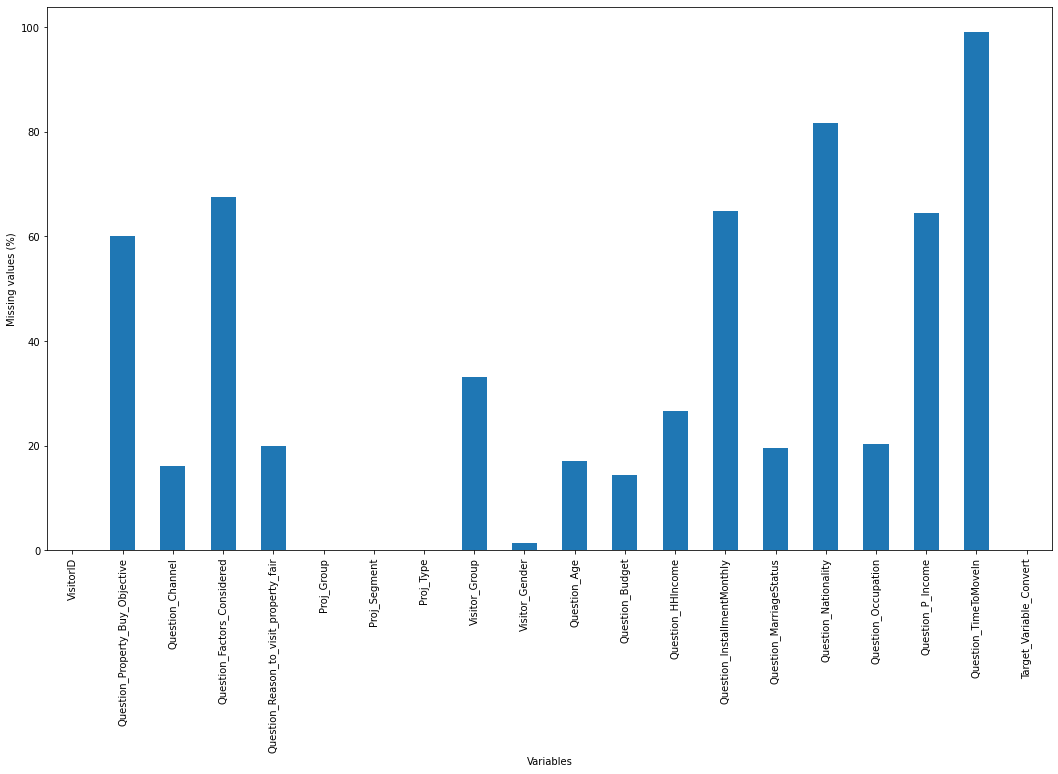

In [23]:
# Plot missing data
(train.isnull().sum() / len(train.index) * 100).plot(kind="bar", figsize=(18, 10))
# Set axis labels
plt.xlabel("Variables")
plt.ylabel("Missing values (%)")
plt.show()

For simplicity, the following actions will be taken:

1. Remove variables that have more than 60% of their values missing.
2. Remove the "VisitorID" column as it is a visitor identifier and is not necessary for the modeling process.

**But what if having 60 % of Nan is the insight?**

To improve the model's performance, we conducted several tests on this column, but the results were not satisfactory. Therefore, we made the decision to remove this column       from the dataset before the modeling stage.


In [24]:
train.drop(
    columns=[
        "VisitorID",
        "Question_Property_Buy_Objective",
        "Question_Factors_Considered",
        "Question_InstallmentMonthly",
        "Question_Nationality",
        "Question_P_Income",
        "Question_TimeToMoveIn",
    ],
    inplace=True,
)

Notice how the columns that we removed do not appear in the dataframe anymore.

Note: Showing the columns as a separate dataframe to facilitate visualization


In [25]:
pd.DataFrame({"Dataframe columns": train.columns})

,Dataframe columns
0,Question_Channel
1,Question_Reason_to_visit_property_fair
2,Proj_Group
3,Proj_Segment
4,Proj_Type
5,Visitor_Group
6,Visitor_Gender
7,Question_Age
8,Question_Budget
9,Question_HHIncome


**Dealing with few missing values features :** 

For numerical columns, we will impute their missing observations with the mean value.

In [26]:
# Using SimpleImpuster:
miss_mean_imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

list_col_imputed = ["Question_Budget", "Question_HHIncome"]

train[list_col_imputed] = miss_mean_imputer.fit_transform(train[list_col_imputed])

For the categorical feature, we use the most frequent variable.

In [27]:
Categorical_features = list(train.select_dtypes(["object"]).columns)

miss_frquent_imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
train[Categorical_features] = miss_frquent_imputer.fit_transform(
    train[Categorical_features]
)

In [28]:
pd.DataFrame({"Missing values (%)": train.isnull().sum() / len(train.index) * 100})

,Missing values (%)
Question_Channel,0.0
Question_Reason_to_visit_property_fair,0.0
Proj_Group,0.0
Proj_Segment,0.0
Proj_Type,0.0
Visitor_Group,0.0
Visitor_Gender,0.0
Question_Age,0.0
Question_Budget,0.0
Question_HHIncome,0.0


**3. Handle Numerical variables :** <a class="anchor" id="5_3"></a>

The **Box-Cox transformation** is a statistical technique used to transform **non-normal** data into a more **normal-like distribution**. This is useful because many statistical techniques, such as regression analysis and hypothesis testing, assume that the data is normally distributed. Transforming non-normal data into a normal-like distribution can make the results of these techniques more accurate and interpretable.

The **Box-Cox transformation** works by transforming a variable x into a new variable y using a power transformation. The specific power transformation used is determined by a parameter λ, which is estimated from the data. If λ is equal to 0, the transformation is a log transformation, while positive values of λ represent power transformations.

The importance of the **Box-Cox transformation** lies in its ability to handle a wide range of non-normal distributions. Unlike other transformations, such as log or square root, the Box-Cox transformation can handle both positive and negative data, as well as data that ranges from zero to positive values. This makes it a versatile tool for transforming data that doesn't meet the assumptions of normality.

In summary, the **Box-Cox transformation** is an important tool for transforming non-normal data into a normal-like distribution. By doing so, it makes the results of many statistical techniques more accurate and interpretable.

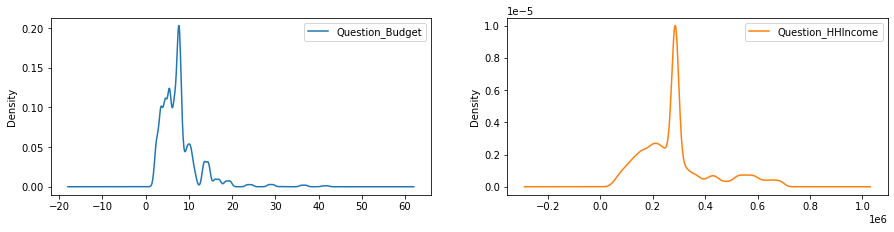

In [29]:
numeric_feature = list(train.select_dtypes(["float"]).columns)

train[numeric_feature].plot(
    kind="density", subplots=True, layout=(4, 2), sharex=False, figsize=(15, 15)
)

In [30]:
numeric_feature

['Question_Budget', 'Question_HHIncome']

In [31]:
# Apply the Box-Cox transformation to the column
col1_boxcox, _ = boxcox(train["Question_Budget"])
col2_boxcox, _ = boxcox(train["Question_HHIncome"])
# Add the transformed column to the data frame
train["Question_Budget"] = col1_boxcox
train["Question_HHIncome"] = col2_boxcox

**Plot of the density of numerical variables afet BOX COX transformation**

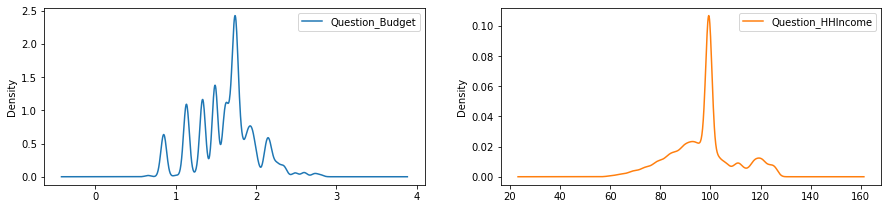

In [32]:
train[numeric_feature].plot(
    kind="density", subplots=True, layout=(4, 2), sharex=False, figsize=(15, 15)
)

**4. Formatting data :**  <a class="anchor" id="5_4"></a>

#### replace categorical variable 

To replace the boolean variable "Target_Variable_Convert" we use the function .astype(int) to transfert to 0, 1 

In [33]:
train["Target_Variable_Convert"] = train["Target_Variable_Convert"].astype(int)

For the other variables we use **One Hot incoder method**

#### Encoding categorical and numerical data :

In [34]:
categorical_columns = [
    c for c in train.columns if train[c].dtype.kind not in ["i", "f"]
]

In [35]:
train = pd.get_dummies(train, columns=categorical_columns)
train.head()

,Question_Budget,Question_HHIncome,Target_Variable_Convert,Question_Channel_Billboard,Question_Channel_Event,Question_Channel_Other,Question_Channel_Radio,Question_Channel_Referral,Question_Channel_TV,Question_Reason_to_visit_property_fair_Company,...,Question_Age_46 - 50,Question_Age_51 +,Question_Age_< 25,Question_MarriageStatus_Married,Question_MarriageStatus_Married with Children,Question_MarriageStatus_Single,Question_Occupation_Business Employee,Question_Occupation_Business Owner,Question_Occupation_Civil Servant,Question_Occupation_Other(Please specify)
0,2.006966,122.091327,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,1,0,0
1,2.125579,110.418927,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,2.006966,99.342512,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
3,1.739881,99.342512,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,2.588271,120.893735,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


<h1><center><font color='blue'>Part 4 : Modeling </font></center></h1> <a class="anchor" id="4"></a>

In this part one have to present the classier class to be used to submit their model that can be used to predict our target variable!

In [ ]:
from sklearn.base import BaseEstimator
import numpy as np


class Classifier(BaseEstimator):
    def __init__(self):
        return

    def fit(self, X, y):
        return

    def predict_proba(self, X):
        y = np.zeros((X.shape[0],2))
        y[:, 0] = 1.
        return y

One can test their solution locally by running the ramp-test command followed by --submission .

In [ ]:
!ramp-test --submission starting_kit

<h1><center><font color='blue'>THE END!</font></center></h1>